In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

In [ ]:
# # split table
# p = '../data/nt_seqs_taxid.csv'

# flt = open(p + '.flt', 'w')
# bad = open(p + '.bad', 'w')

# with open(p) as fin:
#     for i, line in tqdm.tqdm(enumerate(fin)):
#         if line.count(',') == 4:
#             flt.write(line)
#         else:
#             bad.write(line)
#         # if i > 10:
#         #     break

# flt.close()
# bad.close()

113562617it [01:56, 978720.72it/s] 


In [13]:
# data = []
# cols = ['acc', 'gene_id', 'taxid', 'species_name', 'seq_len']
# with open('../data/nt_seqs_taxid.csv.bad') as fin:
#     for line in fin:
#         parts = line.strip().split(',')
#         acc = parts[0]
#         gene_id = parts[1]
#         taxid = parts[2]
#         seq_len = parts[-1]
#         species_name = ','.join(parts[3: -1])
#         data.append([acc, gene_id, taxid, species_name, seq_len])
# df_bad = pd.DataFrame(data, columns=cols)

# p = '../data/nt_seqs_taxid.csv.flt'
# nt_entries = pd.read_csv(p, header=None, names=cols)
# nt_entries_all = pd.concat([nt_entries, df_bad], ignore_index=True)

In [34]:
p = '../data/nt_seqs_taxid.csv.flt'
nt_entries = pd.read_csv(p, header=None, names=cols)
nt_entries

,acc,gene_id,taxid,species_name,seq_len
0,X17276.1,emb|X17276.1|,9646,Ailuropoda melanoleuca,556
1,X51700.1,emb|X51700.1|,9913,Bos taurus,437
2,X68321.1,emb|X68321.1|,9913,Bos taurus,1512
3,X55027.1,emb|X55027.1|,9913,Bos taurus,2367
4,Z12029.1,emb|Z12029.1|,9915,Bos indicus,540
...,...,...,...,...,...
113559304,NM_001384794.1,ref|NM_001384794.1|,9606,Homo sapiens,5511
113559305,NM_001384831.1,ref|NM_001384831.1|,9606,Homo sapiens,5529
113559306,MT379648.1,gb|MT379648.1|,2729096,Gluconacetobacter dulcium,1479
113559307,MT379649.1,gb|MT379649.1|,2729096,Gluconacetobacter dulcium,1479


In [36]:
nt_entries_all = pd.concat([nt_entries, df_bad], ignore_index=True)

In [41]:
nt_entries_all.to_csv('../data/nt_seqs_taxid.csv.gz', index=False)

In [51]:
cnt = nt_entries_all.groupby('species_name').acc.count()
cnt_taxid = nt_entries_all.groupby('taxid').acc.count()

In [52]:
cnt_taxid.sort_values()

taxid
1594477          1
1827219          1
1827218          1
1827217          1
1827216          1
            ...   
61474       660135
11676      1075869
9606       1425060
77133      5776860
2697049    8740422
Name: acc, Length: 2108780, dtype: int64

In [97]:
cnt_taxid.rename('nseqs').to_csv('../data/nt_taxid/taxid2nseqs.csv')

In [86]:
for thr in np.logspace(0, 5, 6):
    ntaxids = cnt_taxid[cnt_taxid > thr].shape[0]
    print(f">{int(thr)} seqs - {ntaxids} taxids")

>1 seqs - 881928 taxids
>10 seqs - 215352 taxids
>100 seqs - 30208 taxids
>1000 seqs - 4142 taxids
>10000 seqs - 1754 taxids
>100000 seqs - 82 taxids


In [91]:
cnt_taxid[cnt_taxid > 3].shape

(557435,)

In [94]:
cnt_taxid[cnt_taxid > 3].index.to_frame().to_csv(
    '../data/nt_taxid/taxids_with_at_least_4_seqs.csv', index=False)

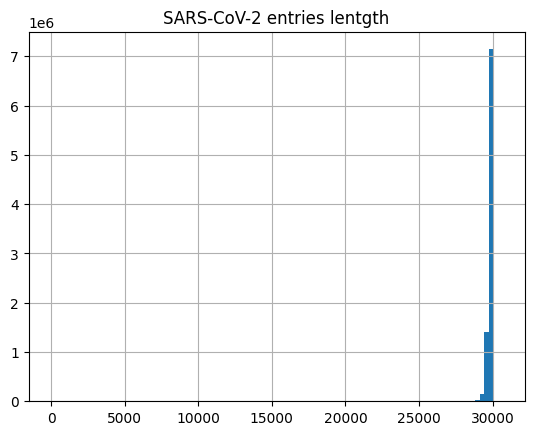

In [88]:
nt_entries_all[nt_entries_all.taxid == 2697049].seq_len.hist(bins=100)
plt.title('SARS-CoV-2 entries lentgth');